In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib inline

In [9]:
alpha = 0.95
N = 100
theta = 1
number_distribution = 100000
tested_sizes = [10, 100]

In [26]:
def show_interval(X, theta_eval, a, b):
    x = np.arange(1, N + 1, 1)
    
    y_min = [theta_eval[0](X[:k]) for k in x]
    y_max = [theta_eval[1](X[:k]) for k in x]
    
    fig = plt.figure(figsize=(20, 15))
    
    ax = fig.gca()
    
    plt.fill_between(x, y_min, y_max)

    ax.set_xlim(0, N)
    ax.set_ylim(a, b)

    plt.show()

In [27]:
def test_interval(distribution, answer, theta_eval):
    ans = []
    for n in tested_sizes:
        number_of_errors_interval  = 0
        for _ in range(number_distribution):
            Y = distribution(n)
            number_of_errors_interval += int(theta_eval[0](Y) < answer < theta_eval[1](Y))
        ans.append(number_of_errors_interval / number_distribution)
    return ans 

In [28]:
first_task = [lambda x: 2 * np.mean(x) / (1 + (3 * len(x) * (1 - alpha)) ** -0.5),
              lambda x: 2 * np.mean(x) / (1 - (3 * len(x) * (1 - alpha)) ** -0.5)]

second_task_1 = [lambda x: np.min(x), lambda x: np.min(x) / (1 - alpha ** (1 / len(x)))]
second_task_2 = [lambda x: np.max(x), lambda x: np.max(x) / (1 - alpha ** (1 / len(x)))]

z = st.norm.ppf(0.5 + alpha / 2)

third_task = [lambda x: np.median(x) - np.pi * z / (2 * (len(x) ** 0.5)), 
              lambda x: np.median(x) + np.pi * z / (2 * (len(x) ** 0.5))]
fourth_task = [(lambda x: (1 - z * (1 / len(x)) ** 0.5) / np.mean(x)), 
               (lambda x: (1 + z * (1 / len(x)) ** 0.5) / np.mean(x))]

uniform_distribution = lambda n: np.random.uniform(0, 1, n)
cauchy_distribution = lambda n: np.random.standard_cauchy(n) + 1
gamma_distribution = lambda n: np.random.gamma(1, 0.1, n)

In [29]:
def interval_processing(distribution, param, param_eval, a, b):
    print(test_interval(distribution, param, param_eval))
    show_interval(distribution(N), param_eval, a, b)

[1.0, 1.0]


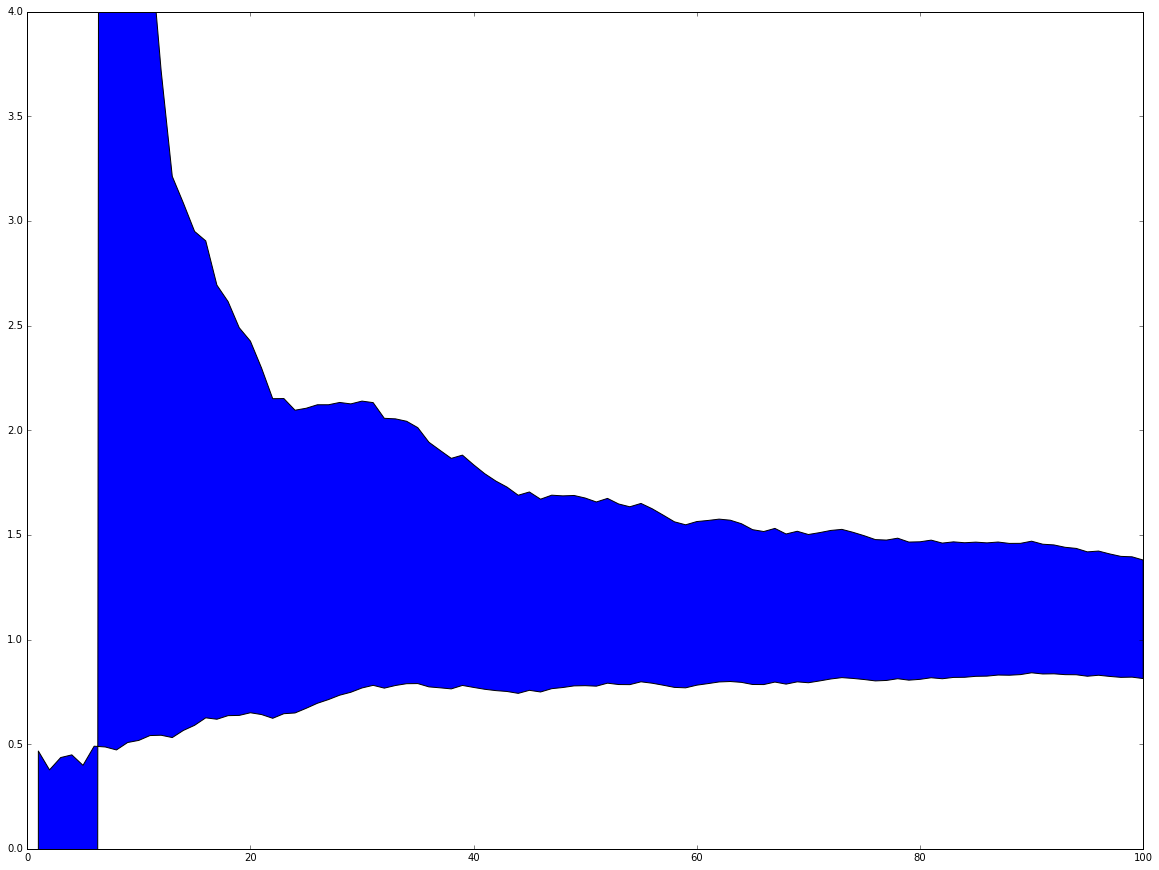

In [30]:
interval_processing(uniform_distribution, theta, first_task, 0, 4)

Доверительный интервал в данном случае шире, чем необходим для уровня доверия 0,95, потому что в него попадают все рассмотренные значения

[0.95042, 0.94893]


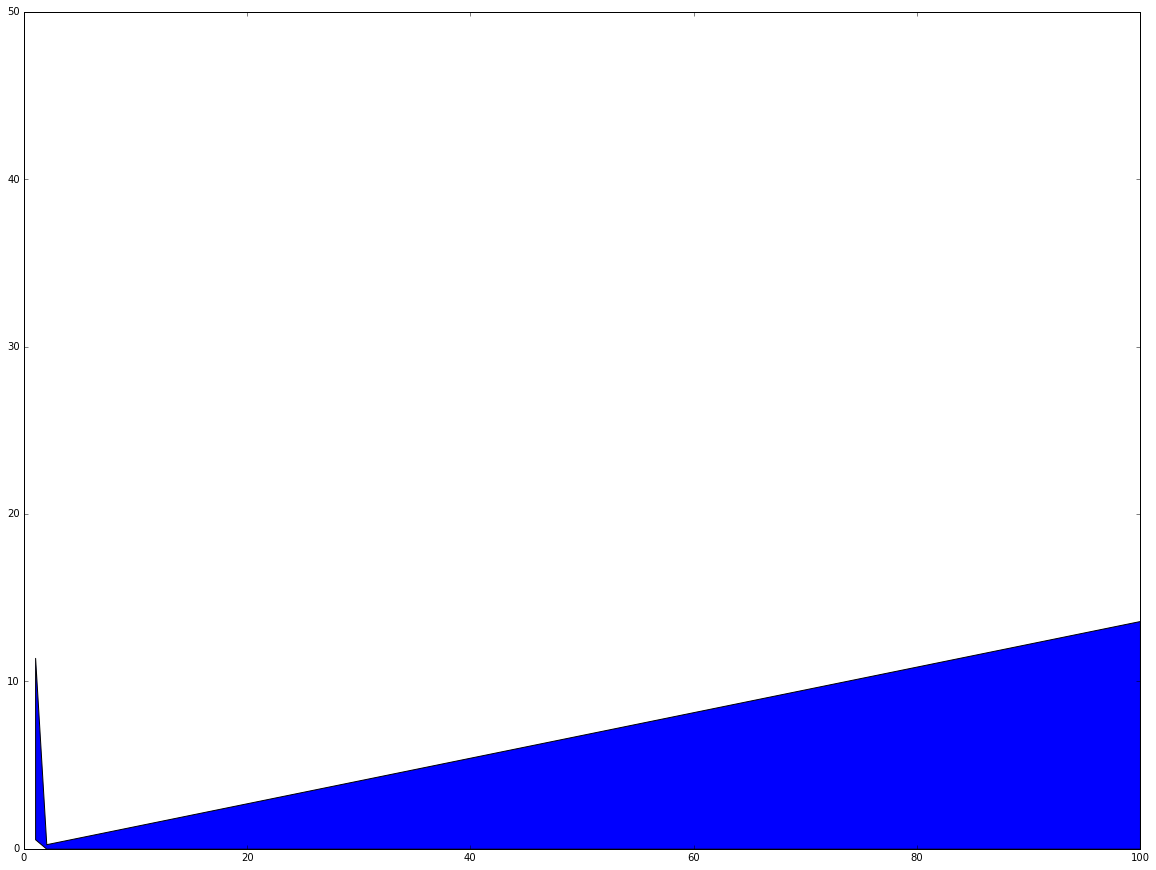

In [31]:
interval_processing(uniform_distribution, theta, second_task_1, 0, 50)

Точный доветительный интервал уровня $\alpha = 0,95$

[1.0, 1.0]


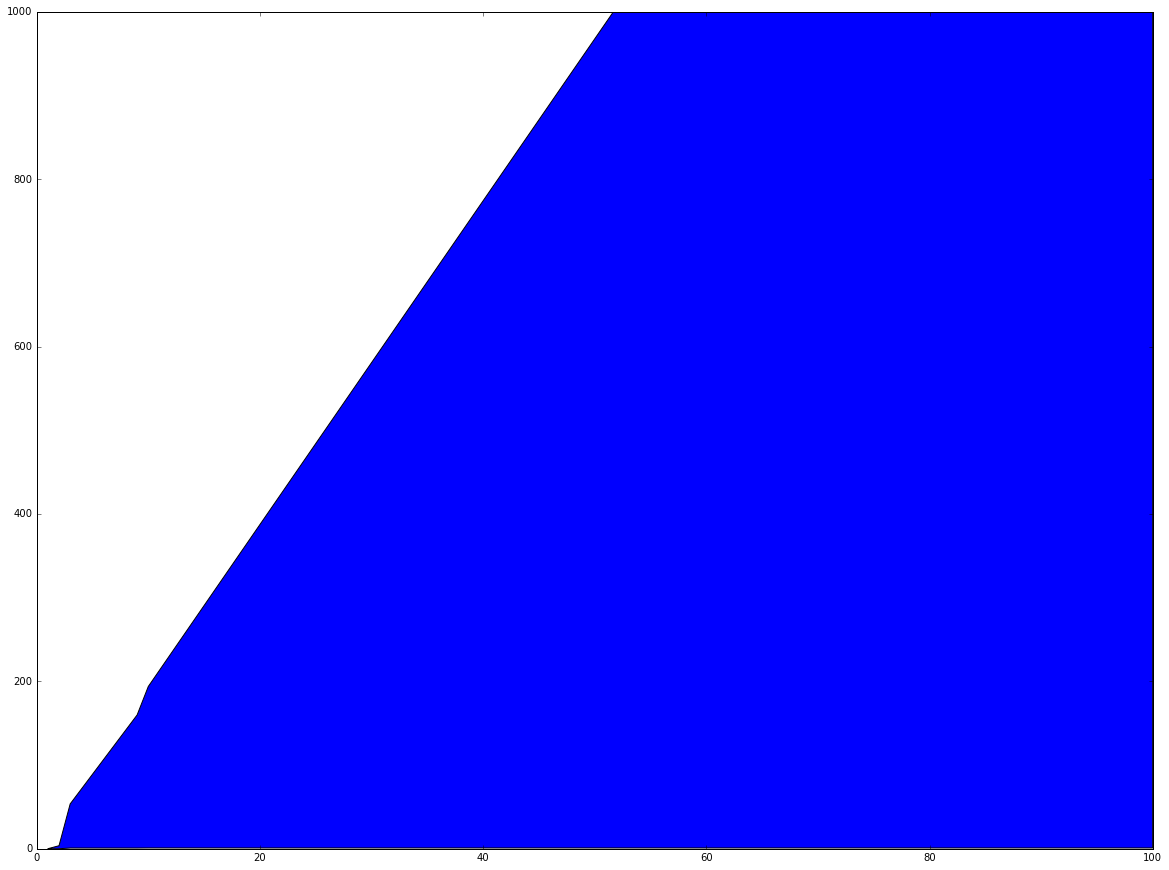

In [32]:
interval_processing(uniform_distribution, theta, second_task_2, 0, 1000)

Доверительный интервал в данном случае шире, чем необходим для уровня доверия 0,95, потому что в него попадают все рассмотренные значения

[0.91558, 0.94535]


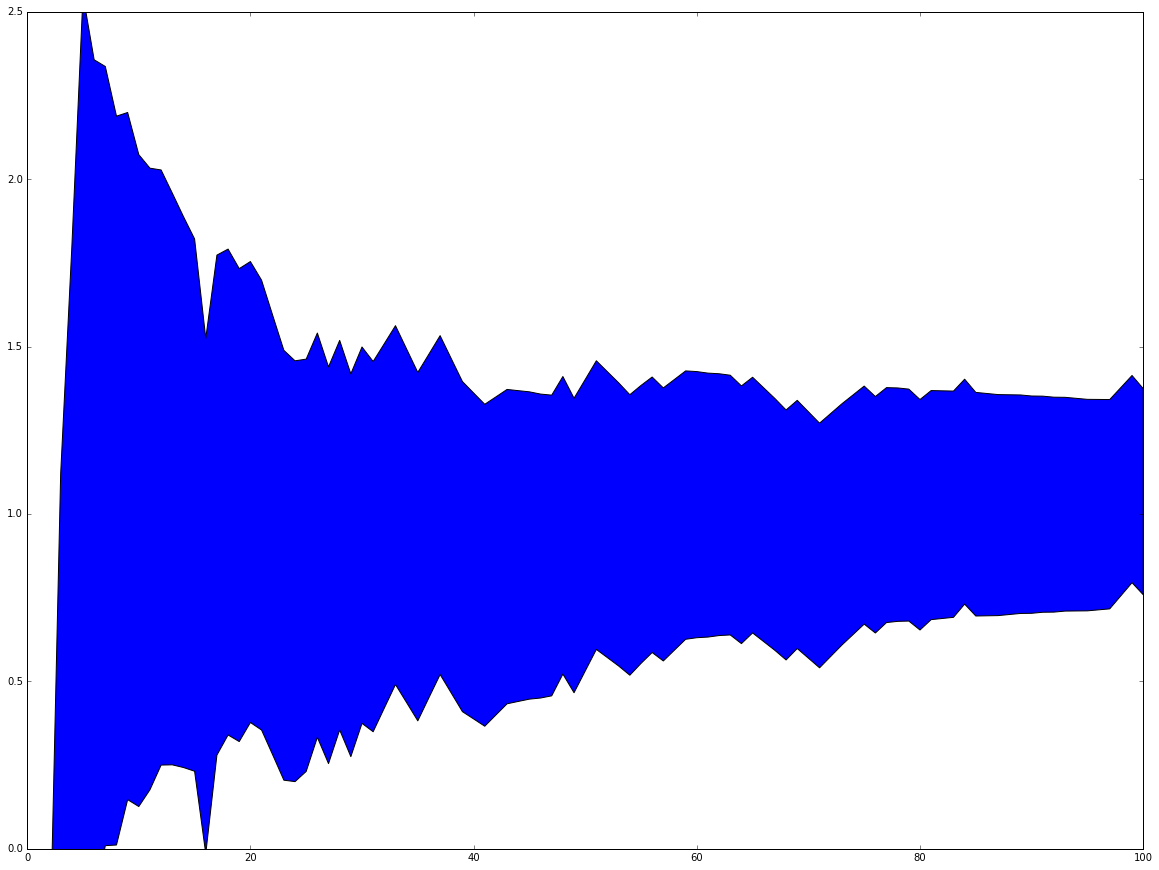

In [33]:
interval_processing(cauchy_distribution, theta, third_task, 0, 2.5)

Ассимптотический доверительный интервал уровня $\alpha = 0,95$ для  $Pois(\theta)$

[0.9552, 0.95034]


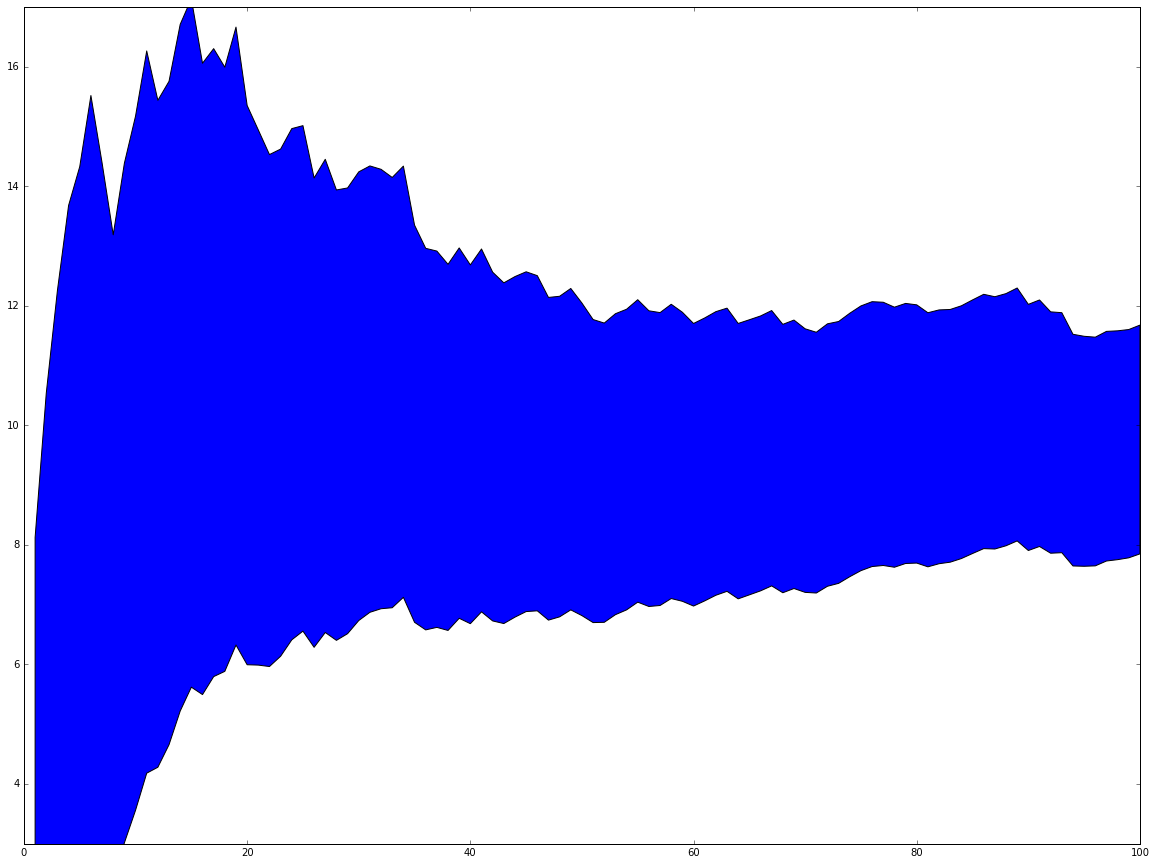

In [34]:
interval_processing(gamma_distribution, 10, fourth_task, 3, 17)

Ассимптотический доверительный интервал уровня $\alpha = 0,95$ для $Г(\theta, \lambda)$